# Foundations of AI & ML
## Session 05
### HomeWork
### Lab

**Objectives:** Using the training data estimate the regression coefficients using maximum likelihood.
Refer http://www.machinegurning.com/rstats/logreg_math/ for detailed Problem Description.

**DataSet Description** This data approach student achievement in secondary education of two Portuguese schools. The data attributes include student grades, demographic, social and school related features) and it was collected by using school reports and questionnaires. We are going to work on the Maths DataSet.

**Attribute Information**

1 school - student's school (binary: 'GP' - Gabriel Pereira or 'MS' - Mousinho da Silveira) 

2 sex - student's sex (binary: 'F' - female or 'M' - male) 

3 age - student's age (numeric: from 15 to 22) 

4 address - student's home address type (binary: 'U' - urban or 'R' - rural) 

5 famsize - family size (binary: 'LE3' - less or equal to 3 or 'GT3' - greater than 3) 

6 Pstatus - parent's cohabitation status (binary: 'T' - living together or 'A' - apart) 

7 Medu - mother's education (numeric: 0 - none, 1 - primary education (4th grade), 2 â€“ 5th to 9th grade, 3 â€“ secondary education or 4 â€“ higher education) 

8 Fedu - father's education (numeric: 0 - none, 1 - primary education (4th grade), 2 â€“ 5th to 9th grade, 3 â€“ secondary education or 4 â€“ higher education) 

9 Mjob - mother's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other') 

10 Fjob - father's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other') 

11 reason - reason to choose this school (nominal: close to 'home', school 'reputation', 'course' preference or 'other') 

12 guardian - student's guardian (nominal: 'mother', 'father' or 'other') 

13 traveltime - home to school travel time (numeric: 1 - <15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, or 4 - >1 hour) 

14 studytime - weekly study time (numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours)

15 failures - number of past class failures (numeric: n if 1<=n<3, else 4) 

16 schoolsup - extra educational support (binary: yes or no) 

17 famsup - family educational support (binary: yes or no) 

18 paid - extra paid classes within the course subject (Math) (binary: yes or no) 

19 activities - extra-curricular activities (binary: yes or no) 

20 nursery - attended nursery school (binary: yes or no) 

21 higher - wants to take higher education (binary: yes or no) 

22 internet - Internet access at home (binary: yes or no) 

23 romantic - with a romantic relationship (binary: yes or no) 

24 famrel - quality of family relationships (numeric: from 1 - very bad to 5 - excellent) 

25 freetime - free time after school (numeric: from 1 - very low to 5 - very high) 

26 goout - going out with friends (numeric: from 1 - very low to 5 - very high) 

27 Dalc - workday alcohol consumption (numeric: from 1 - very low to 5 - very high) 

28 Walc - weekend alcohol consumption (numeric: from 1 - very low to 5 - very high) 

29 health - current health status (numeric: from 1 - very bad to 5 - very good) 

30 absences - number of school absences (numeric: from 0 to 93) 

31 G1 - first period grade (numeric: from 0 to 20) 

32 G2 - second period grade (numeric: from 0 to 20) 

32 G3 - final grade (numeric: from 0 to 20, output target)

In [1]:
import pandas as pd

In [3]:
def convert(s):
    value = s.strip().lower()
    if value in ["gp", "f", "u", "gt3","a","mother","yes","at_home","pass"]:
        return 1
    if value in ["ms", "m", "r", "le3","t","father","no","services","fail"]:
        return 0
    if value in ["health","course"]:
        return 2
    if value in ["teacher","reputation"]:
        return 3
    return -1

data = pd.read_csv("../Datasets/newstudentdata.csv",converters={'school':convert, 'sex':convert, 'address':convert, 'famsize':convert, 'Pstatus':convert,
       'Mjob':convert, 'Fjob':convert, 'reason':convert, 'guardian':convert,
       'schoolsup':convert, 'famsup':convert, 'paid':convert, 'activities':convert,
       'nursery':convert, 'higher':convert, 'internet':convert, 'romantic':convert,'grade':convert})

In [4]:
data.head()

,Unnamed: 0,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,...,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,grade
0,0,1,1,18,1,1,1,4,4,1,...,1,0,0,4,3,4,1,1,3,0
1,1,1,1,17,1,1,0,1,1,1,...,1,1,0,5,3,3,1,1,3,0
2,2,1,1,15,1,0,0,1,1,1,...,1,1,0,4,3,2,2,3,3,0
3,3,1,1,15,1,1,0,4,2,2,...,1,1,1,3,2,2,1,1,5,1
4,4,1,1,16,1,1,0,3,3,-1,...,1,0,0,4,3,2,1,2,5,0


split into training and test

In [5]:
import numpy as np
import random
TRAIN_TEST_RATIO = 0.85
picker = list(range(data.shape[0]))
# random.shuffle(picker)       ### randomly shuffle the data
trainMax = int(len(picker) * TRAIN_TEST_RATIO)
train_data = []
test_data = []
train_labels = []
test_labels = []
for pick in picker[:trainMax]:
    train_data.append(list(data.values[pick][1:-1]))         ### select 80% of data to be used as training set
    train_labels.append((data.values[pick][-1]))
for pick in picker[trainMax:]:
    test_data.append(list(data.values[pick][1:-1]))       ### select 20% of data to be used as test set
    test_labels.append((data.values[pick][-1]))
num_feat = len(train_data[0])    ## number of features to train

train_data=np.array(train_data)
train_labels=np.array(train_labels)
train_labels = np.reshape(train_labels,(train_data.shape[0],1))
test_data=np.array(test_data)
test_labels=np.array(test_labels)
test_labels=np.reshape(test_labels,(test_data.shape[0],1))
print(num_feat)
print(train_data.shape, train_labels.shape)
print(train_data[0])
print(train_labels[0])


29
(335, 29) (335, 1)
[ 1  1 18  1  1  1  4  4  1  3  2  1  2  2  0  1  0  0  0  1  1  0  0  4
  3  4  1  1  3]
[0]


define logistic function and sgd

In [9]:
np.hstack( (train_data,np.ones((train_data.shape[0],1))) )

array([[ 1.,  1., 18., ...,  1.,  3.,  1.],
       [ 1.,  1., 17., ...,  1.,  3.,  1.],
       [ 1.,  1., 15., ...,  3.,  3.,  1.],
       ...,
       [ 1.,  1., 18., ...,  1.,  4.,  1.],
       [ 1.,  1., 18., ...,  1.,  2.,  1.],
       [ 1.,  1., 18., ...,  1.,  4.,  1.]])

In [6]:
import numpy as np
def logf(a, x):
    return 1.0 / (1.0 + np.exp(-((x @ a))))

def dlogf(a, x):
    ##
    ## The derivative of the logistic function is f * (1 - f)
    ##
    return logf(a, x) * (1 - logf(a, x))

def one_step(x, y, a, eta):
    x=np.hstack( (x,np.ones((x.shape[0],1))) ) # Appending 1 at the end of all train data rows
    ypred = logf(a, x)
    error = np.asscalar(sum((y - ypred)**2))
    delta_a = sum((y - ypred) * ypred * (1 - ypred) * x)
    delta_a = np.reshape(delta_a, (delta_a.shape[0],1))
    a = a + (delta_a * eta)
    return a, error/y.shape[0]

In [17]:
logf(np.ones((2, 1)), np.ones((3, 2)))

array([[0.88079708],
       [0.88079708],
       [0.88079708]])

do batch gradient descent to estimate coefficients

In [10]:
a = np.zeros((num_feat+1,1))
eta = 0.002
for times in range(50000):
    a, error = one_step(train_data, train_labels, a, eta)
    if times%1000==0:
        print(error)

0.25
0.41492442563436754
0.4149243173052042
0.41492418087943994
0.41492400377483885
0.41492376456863145
0.4149234235711046
0.4149228980579079
0.4149219821621679
0.41491998132666136
0.4149121319225214
0.4149231354562038
0.41492241082781883
0.41492098651942694
0.41491689219867217
0.4147795008174788
0.3721136037315019
0.2949220902709142
0.18594181086561307
0.20342819398407117
0.26376441045256716
0.20082385978282974
0.26102753386862587
0.2094411285297479
0.24793505019958695
0.1957189879307379
0.18577593186149366
0.20820371098349566
0.24973393832204593
0.18283058516374864
0.2013077001304799
0.1851025423558289
0.18697769560917862
0.18760383826033816
0.18187670799608507
0.1864335801557109
0.1841794382219442
0.18189380362710844
0.19104939443238822
0.18815784888864343
0.19485046776678827
0.19521170217412478
0.19530793878896435
0.19525315505088453
0.19511291347150822
0.19493993788537906
0.1947636228038335
0.19459398736093167
0.19443190965655202
0.1942754332898977


In [12]:
one_step(train_data, train_labels, a, eta)

(array([[ 3.36397046],
        [-3.37993832],
        [-0.11651035],
        [ 1.25953214],
        [-0.98031791],
        [ 2.44553514],
        [ 0.75702605],
        [ 0.65884536],
        [-0.43117021],
        [ 1.162318  ],
        [ 0.73892885],
        [ 1.07986242],
        [ 0.20880345],
        [ 0.85583823],
        [-4.12551707],
        [-6.51892891],
        [-1.08387023],
        [-0.24357922],
        [-2.26568681],
        [-1.6592028 ],
        [ 0.72801781],
        [ 2.77601225],
        [-0.69415685],
        [-0.97509239],
        [ 0.81037869],
        [-1.1112997 ],
        [ 0.56253498],
        [-0.79394775],
        [ 0.06367337],
        [ 3.36397046]]), 0.19412235872804845)

get accuracy 

In [18]:
test_data_append=np.hstack( (test_data, np.ones((test_data.shape[0],1))) )
pred_labels = np.round(logf(a,test_data_append)) # Using round() to make >.5 --> 1
print(pred_labels.shape, test_labels.shape)
#print((pred_labels[:,0]==test_labels[:,0]))

(60, 1) (60, 1)


In [19]:
results = []
for i in range(len(pred_labels)):
    results.append(pred_labels[i]==test_labels[i])

In [20]:
results.count(True)/len(pred_labels)

0.65

**Excerise 1 :**  Plot the Precision-Recall Curve.

In [46]:
p = pred_labels
p = p.flatten()
p, [True if i else False for i in pred_labels.flatten()]
p.sum()
p

array([1., 0., 0., 1., 1., 0., 0., 1., 1., 1., 1., 1., 1., 1., 0., 0., 1.,
       0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0.,
       1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 1., 1.])

In [85]:
def confusionmatrix(actuals, prediction):
    TruePositive = sum([int(a == True and p == True) for a, p in zip(actuals, prediction)])
    TrueNegative = sum([int(a == False and p == False) for a, p in zip(actuals, prediction)])
    FalsePositive = sum([int(a == False and p == True) for a, p in zip(actuals, prediction)])
    FalseNegative = sum([int(a == True and p == False) for a, p in zip(actuals, prediction)])
    return TruePositive, TrueNegative, FalsePositive, FalseNegative

def get_precision_recall(test_labels, pred_labels, thresh):
    TruePositive, TrueNegative, FalsePositive, FalseNegative = confusionmatrix([True if i else False for i in test_labels.flatten()], [True if i else False for i in pred_labels.flatten()])
    
    # Precision  = tp / (tp + fp)
    precision = float(TruePositive/(TruePositive + FalsePositive)) if TruePositive + FalsePositive != 0 else 99999.
    
    # Recall = tp / ( tp + fn ) 
    recall = float(TruePositive/(TruePositive + FalseNegative)) if TruePositive + FalsePositive != 0 else 99999.             
    
#     print('Precision = %f' % precision)
#     print('Recall = %f' % recall)
    
    return [thresh, precision, recall]

get_precision_recall(test_labels, pred_labels, 0.5)

[0.5, 0.8181818181818182, 0.5142857142857142]

In [22]:
# For precision/recall curve, we have to tweak the probability for True from 0 to 1
predicted_probs = logf(a,test_data_append)
predicted_probs

array([[8.99008234e-01],
       [2.24094276e-03],
       [3.34675059e-01],
       [9.50630003e-01],
       [5.16424712e-01],
       [1.37669581e-05],
       [5.04392456e-02],
       [8.57935602e-01],
       [5.00017881e-01],
       [7.80724449e-01],
       [7.37991384e-01],
       [9.96781969e-01],
       [8.39490248e-01],
       [5.20164467e-01],
       [1.45843196e-01],
       [2.89375330e-08],
       [7.54942295e-01],
       [2.44137148e-02],
       [1.54175333e-05],
       [2.28875616e-02],
       [1.67732324e-03],
       [8.59586000e-04],
       [8.92575775e-01],
       [8.48940202e-01],
       [3.17501719e-01],
       [4.04860298e-03],
       [3.16298213e-05],
       [4.88300453e-02],
       [7.54336027e-01],
       [5.49864417e-02],
       [3.86460964e-03],
       [9.78435047e-01],
       [2.43170129e-04],
       [2.06430112e-03],
       [9.87645314e-01],
       [2.10395304e-07],
       [3.55517032e-04],
       [2.78324850e-02],
       [8.53441375e-04],
       [8.84020397e-01],


In [88]:
def get_predictions_for_thresholds(p_probs):
    thresholds = np.linspace(0.0, 1.0, num=10) # What probabilites considered as True?
    preds = {}
    for t in thresholds:
        preds[t] = p_probs > t
    #     print(p)
    return preds

def get_precision_recall_curve_data(test_labels, predicted_probs):
    data = []
    threshold_predictions = get_predictions_for_thresholds(predicted_probs)
    for k, v in threshold_predictions.items():
#         print('For threshold = %f' % k)
#         print(get_precision_recall(test_labels, v))
        p_r = get_precision_recall(test_labels, v, k)
        data += [p_r]
        
    return data

prec_rec_data = get_precision_recall_curve_data(test_labels, predicted_probs)


In [97]:
prec_rec_data.sort()
prec_rec_data
[i[2] for i in prec_rec_data], [i[1] for i in prec_rec_data] #recall, prec

([1.0,
  0.5714285714285714,
  0.5428571428571428,
  0.5142857142857142,
  0.5142857142857142,
  0.45714285714285713,
  0.45714285714285713,
  0.34285714285714286,
  0.22857142857142856,
  99999.0],
 [0.5833333333333334,
  0.8,
  0.7916666666666666,
  0.782608695652174,
  0.8181818181818182,
  0.8888888888888888,
  0.8888888888888888,
  0.8571428571428571,
  0.8888888888888888,
  99999.0])

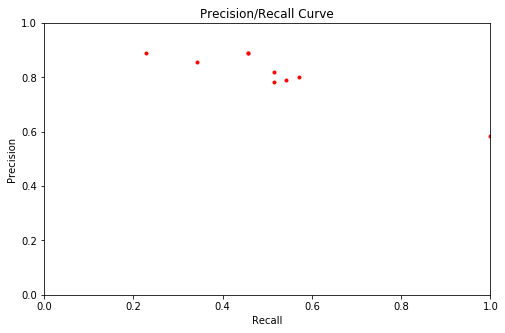

In [103]:
# Draw precision/recall curve
def prec_recall_curve_plot(prec_rec_data):
    import matplotlib.pyplot as plt
    plt.figure(figsize=(8,5))
    prec_rec_data.sort()
    plt.plot([i[2] for i in prec_rec_data], [i[1] for i in prec_rec_data], 'r.')
    plt.xlabel("Recall")
    plt.ylabel("Precision")
    plt.title("Precision/Recall Curve")
    axes = plt.gca()
    axes.set_xlim([0,1.0])
    axes.set_ylim([0,1.0])
    plt.show()
    
prec_recall_curve_plot(prec_rec_data)    

**Excerise 2:** Vary the above ratio between Training and Testing.Verify the effect if any on the prediction accuracy.

In [104]:
TRAIN_TEST_RATIO = 0.85
def train_test_split(data, TRAIN_TEST_RATIO):
    picker = list(range(data.shape[0]))
    # random.shuffle(picker)       ### randomly shuffle the data
    trainMax = int(len(picker) * TRAIN_TEST_RATIO)
    train_data = []
    test_data = []
    train_labels = []
    test_labels = []
    for pick in picker[:trainMax]:
        train_data.append(list(data.values[pick][1:-1]))         ### select TRAIN_TEST_RATIO of data to be used as 
        train_labels.append((data.values[pick][-1]))
    for pick in picker[trainMax:]:
        test_data.append(list(data.values[pick][1:-1]))       ### select 1-TRAIN_TEST_RATIO% of data to be used as test set
        test_labels.append((data.values[pick][-1]))
    num_feat = len(train_data[0])    ## number of features to train

    train_data=np.array(train_data)
    train_labels=np.array(train_labels)
    train_labels = np.reshape(train_labels,(train_data.shape[0],1))
    test_data=np.array(test_data)
    test_labels=np.array(test_labels)
    test_labels=np.reshape(test_labels,(test_data.shape[0],1))
    print(num_feat)
    print(train_data.shape, train_labels.shape)
    print(train_data[0])
    print(train_labels[0])
    
    return train_data, train_labels, test_data, test_labels